<a href="https://colab.research.google.com/github/DanhNguyen21/DanhNguyen21/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_10_m%C3%B3n_%C4%83n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nguyễn Công Danh - 19146164 Lớp AI tối thứ 7 Link google drive: https://drive.google.com/drive/folders/1WdBbneA6WR8Yvy9GTvO-52ZJFZvN2kOU?usp=sharing

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Mon_an/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 200 images belonging to 10 classes.


In [ ]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Mon_an/test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 200 images belonging to 10 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
7/7 [==============================] - 107s 16s/step - loss: 9.2416 - accuracy: 0.1100 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 2/100
7/7 [==============================] - 21s 3s/step - loss: 2.3022 - accuracy: 0.0850 - val_loss: 2.2991 - val_accuracy: 0.1300
Epoch 3/100
7/7 [==============================] - 21s 3s/step - loss: 2.2885 - accuracy: 0.1600 - val_loss: 2.2098 - val_accuracy: 0.1050
Epoch 4/100
7/7 [==============================] - 21s 3s/step - loss: 2.2160 - accuracy: 0.2050 - val_loss: 2.2433 - val_accuracy: 0.2450
Epoch 5/100
7/7 [==============================] - 21s 3s/step - loss: 2.1690 - accuracy: 0.2900 - val_loss: 1.8554 - val_accuracy: 0.2950
Epoch 6/100
7/7 [==============================] - 21s 3s/step - loss: 1.7976 - accuracy: 0.3250 - val_loss: 1.6517 - val_accuracy: 0.4450
Epoch 7/100
7/7 [==============================] - 21s 3s/step - loss: 1.5408 - accuracy: 0.4950 - val_loss: 1.5915 - val_accuracy: 0.4400
Epoch 8/100
7/7 [========

Sai số kiểm tra là:  0.05130545794963837
Độ chính xác kiểm tra là:  0.9800000190734863


<function matplotlib.pyplot.show>

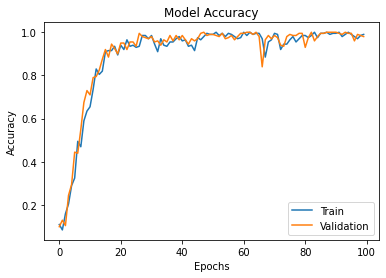

In [9]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [10]:
model.save('model_Mon_an.h5')
model=load_model('model_Mon_an.h5')

Banhxeo


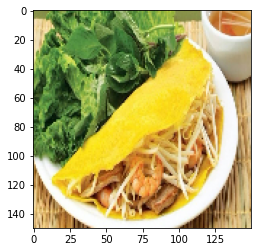

In [11]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/banh-xeo-avt-1536054575-126-width640height480_schema_article.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

BanhUot


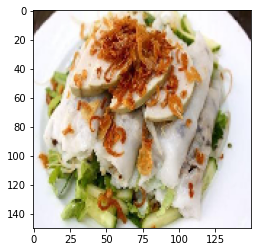

In [12]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/cach-lam-banh-cuon-ngon-bang-chao-chong-dinh-nhanh-gon-tai-nha-cach-lam-banh-cuon-6-1554869118-748-width493height322.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

Banhhoi


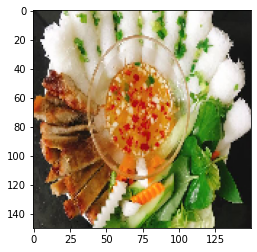

In [13]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/cach-lam-banh-hoi-16.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

Banhdalon


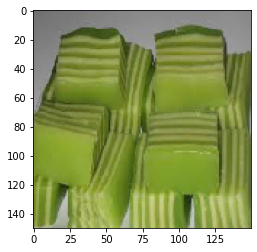

In [14]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/images.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

ComSuon


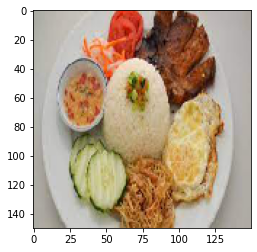

In [19]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/tải xuống (7).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

In [ ]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/banh-xeo-avt-1536054575-126-width640height480_schema_article.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

In [ ]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/banh-xeo-avt-1536054575-126-width640height480_schema_article.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)

In [ ]:
img=load_img("/content/drive/MyDrive/Mon_an/thu/banh-xeo-avt-1536054575-126-width640height480_schema_article.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='BanhMi'
if round(result[0][1])==1:
  prediction='BanhUot'
if round(result[0][2])==1:
  prediction='Banhdalon'
if round(result[0][3])==1:
  prediction='Banhhoi'
if round(result[0][4])==1:
  prediction='Banhxeo'
if round(result[0][5])==1:
  prediction='BunDauMamTom'
if round(result[0][6])==1:
  prediction='ComSuon'
if round(result[0][7])==1:
  prediction='GaChien'
if round(result[0][8])==1:
  prediction='Pho'
if round(result[0][9])==1:
  prediction='Thitkhotau'
print(prediction)